In [13]:
# 必要なライブラリのimport
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [14]:
# CSVファイルのデータを読み込む
data = pd.read_csv('./modeling-advanced.csv')

# 先頭5件を表示
data.head()

,Lost_number,Temperature,Humidity
0,6,17.5,36
1,11,26.6,33
2,2,5.0,42
3,4,14.1,48
4,2,9.4,45


In [15]:
# 説明変数を気温のみで一般化線形モデルを作成
model_1 = smf.glm('Lost_number ~ Temperature', data=data, family=sm.families.Poisson()).fit()

In [16]:
# model_1の詳細を確認
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Lost_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Thu, 22 May 2025   Deviance:                       5.1373
Time:                        09:22:54   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      

In [17]:
# 説明変数を気温・湿度で一般化線形モデルを作成
model_2 = smf.glm('Lost_number ~ Temperature+Humidity', data=data, family=sm.families.Poisson()).fit()

In [18]:
# model_2の詳細を確認
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Lost_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       27
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.668
Date:                Thu, 22 May 2025   Deviance:                       5.1308
Time:                        09:22:54   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4128      0.477      0.865      

In [19]:
# AICを比較
print('Model-1:',model_1.aic.round(3))
print('Model-2:',model_2.aic.round(3))

Model-1: 119.343
Model-2: 121.337


In [20]:
# 気温が10度の場合のデータフレームを作成
sampleData_1 = pd.DataFrame({"Temperature": 10}, index=[0])
sampleData_1

,Temperature
0,10


In [21]:
# 気温が10度の場合の落とし物の数の予測値
pred_1 = model_1.predict(sampleData_1)
pred_1

0    3.348029
dtype: float64

In [22]:
# 気温が10度、湿度が30%の場合のデータフレームを作成
sampleData_2 = pd.DataFrame({"Temperature": 10, "Humidity": 30}, index=[0])
sampleData_2

,Temperature,Humidity
0,10,30


In [23]:
# 気温が10度、湿度が30%の場合の落とし物の数の予測値
pred_2 = model_2.predict(sampleData_2)
pred_2

0    3.314558
dtype: float64

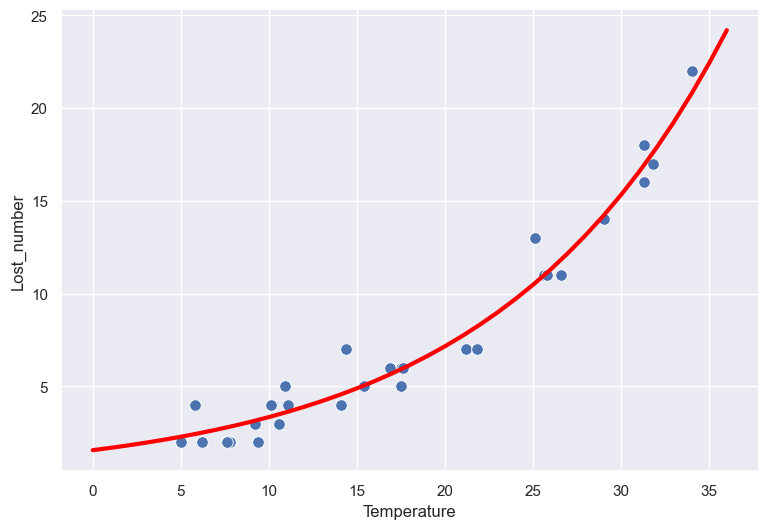

In [ ]:
# 回帰曲線の図示
fig, ax = plt.subplots(figsize=(9, 6))

x = np.arange(0, 37)
# predictメソッドには引数としてDataFrameを渡します。
# pd.DataFrame()には、{"列名": 値}のようにカラム名をキーとする辞書を渡します。
pred = model_1.predict(pd.DataFrame({'Temperature': x}))

sns.scatterplot(x ='Temperature', y='Lost_number', data=data, s=70, ax=ax)
ax.plot(x, pred, color='red', lw=3)